In [1]:
import pandas as pd
import sqlite3
import requests

In [3]:
# Extract CSV Data
csv_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_csv = pd.read_csv(csv_url)
df_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df_csv.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_csv.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
df_csv_cleaned = df_csv.copy()

In [51]:
# Fill missing values correctly
df_csv_cleaned.loc[:, 'Age'] = df_csv_cleaned['Age'].fillna(df_csv_cleaned['Age'].median())
df_csv_cleaned.loc[:, 'Cabin'] = df_csv_cleaned['Cabin'].fillna('Unknown')
df_csv_cleaned.loc[:, 'Embarked'] = df_csv_cleaned['Embarked'].fillna(df_csv_cleaned['Embarked'].mode()[0])

In [55]:
df_csv_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [23]:

# Extract JSON Data
json_url = "https://jsonplaceholder.typicode.com/users"
df_json = pd.read_json(json_url)
df_json

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


In [25]:

df_json.dtypes

id           int64
name        object
username    object
email       object
address     object
phone       object
website     object
company     object
dtype: object

In [27]:
df_json.isnull().sum()

id          0
name        0
username    0
email       0
address     0
phone       0
website     0
company     0
dtype: int64

In [29]:
# Extract API Data (Weather Data)
api_key = "c6d622616af71712b32b3d31695efb70"  # Default API key
city = "London"  # Replace with your desired city
api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

try:
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an exception for HTTP errors
    api_data = response.json()
    # Normalize and flatten the JSON data
    df_api = pd.json_normalize(api_data)
    print("API Data:")
    print(df_api.head())
except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except Exception as err:
    print(f"An error occurred: {err}")

API Data:
                                             weather      base  visibility  \
0  [{'id': 801, 'main': 'Clouds', 'description': ...  stations       10000   

           dt  timezone       id    name  cod  coord.lon  coord.lat  ...  \
0  1741764667         0  2643743  London  200    -0.1257    51.5085  ...   

   main.sea_level  main.grnd_level  wind.speed  wind.deg  clouds.all  \
0            1004             1000        2.57       280          17   

   sys.type   sys.id  sys.country  sys.sunrise  sys.sunset  
0         2  2091269           GB   1741760480  1741802358  

[1 rows x 26 columns]


In [37]:
df_api.dtypes


weather             object
base                object
visibility           int64
dt                   int64
timezone             int64
id                   int64
name                object
cod                  int64
coord.lon          float64
coord.lat          float64
main.temp          float64
main.feels_like    float64
main.temp_min      float64
main.temp_max      float64
main.pressure        int64
main.humidity        int64
main.sea_level       int64
main.grnd_level      int64
wind.speed         float64
wind.deg             int64
clouds.all           int64
sys.type             int64
sys.id               int64
sys.country         object
sys.sunrise          int64
sys.sunset           int64
dtype: object

In [39]:
df_api.isnull().sum()

weather            0
base               0
visibility         0
dt                 0
timezone           0
id                 0
name               0
cod                0
coord.lon          0
coord.lat          0
main.temp          0
main.feels_like    0
main.temp_min      0
main.temp_max      0
main.pressure      0
main.humidity      0
main.sea_level     0
main.grnd_level    0
wind.speed         0
wind.deg           0
clouds.all         0
sys.type           0
sys.id             0
sys.country        0
sys.sunrise        0
sys.sunset         0
dtype: int64

In [57]:
# Clean CSV data
df_csv_cleaned = df_csv[['PassengerId', 'Name', 'Sex', 'Age', 'Fare']].dropna()

In [59]:
# Clean JSON data
df_json_cleaned = df_json[['id', 'name', 'email']].rename(columns={'name': 'employee_name'})

In [61]:
# Transform API data to have a mock 'id' column and select relevant columns
df_api_cleaned = df_api[['weather', 'main.temp', 'main.humidity']].rename(columns={'main.temp': 'temperature', 'main.humidity': 'humidity'})
df_api_cleaned['id'] = df_csv_cleaned['PassengerId'] % 10  # Mock 'id' for merging

In [86]:
# Remove lists from 'weather' column
df_api_cleaned['weather'] = df_api_cleaned['weather'].apply(lambda x: x[0]['description'] if isinstance(x, list) else x)


In [65]:
# Merge datasets for demonstration
df_csv_cleaned['id'] = df_csv_cleaned['PassengerId'] % 10  # Mock 'id' for merging
df_merged = pd.merge(df_csv_cleaned, df_json_cleaned, on='id', how='inner')
df_final = pd.merge(df_merged, df_api_cleaned, on='id', how='inner')

In [67]:
conn = sqlite3.connect('my_warehouse.db')

In [69]:
# Load transformed data into SQLite
df_final.to_sql('final_data', conn, if_exists='replace', index=False)

72

In [71]:
print(pd.read_sql('SELECT * FROM final_data LIMIT 5', conn))

   PassengerId                                            Name     Sex   Age  \
0            1                         Braund, Mr. Owen Harris    male  22.0   
1           11                 Sandstrom, Miss. Marguerite Rut  female   4.0   
2           21                            Fynney, Mr. Joseph J    male  35.0   
3           31                        Uruchurtu, Don. Manuel E    male  40.0   
4           41  Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  female  40.0   

      Fare  id  employee_name              email     weather  temperature  \
0   7.2500   1  Leanne Graham  Sincere@april.biz  few clouds        277.2   
1  16.7000   1  Leanne Graham  Sincere@april.biz  few clouds        277.2   
2  26.0000   1  Leanne Graham  Sincere@april.biz  few clouds        277.2   
3  27.7208   1  Leanne Graham  Sincere@april.biz  few clouds        277.2   
4   9.4750   1  Leanne Graham  Sincere@april.biz  few clouds        277.2   

   humidity  
0        81  
1        81  
2        81  


In [75]:
df_merged.to_sql('df_merged', conn, if_exists='replace', index=False)

642

In [77]:
print(pd.read_sql('SELECT * FROM df_merged LIMIT 5', conn))

   PassengerId                                               Name     Sex  \
0            1                            Braund, Mr. Owen Harris    male   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2            3                             Heikkinen, Miss. Laina  female   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4            5                           Allen, Mr. William Henry    male   

    Age     Fare  id     employee_name                      email  
0  22.0   7.2500   1     Leanne Graham          Sincere@april.biz  
1  38.0  71.2833   2      Ervin Howell          Shanna@melissa.tv  
2  26.0   7.9250   3  Clementine Bauch         Nathan@yesenia.net  
3  35.0  53.1000   4  Patricia Lebsack  Julianne.OConner@kory.org  
4  35.0   8.0500   5  Chelsey Dietrich   Lucio_Hettinger@annie.ca  


In [94]:
df_final.describe()

,PassengerId,Age,Fare,id,temperature,humidity
count,72.000000,72.000000,72.000000,72.0,7.200000e+01,72.0
mean,446.972222,29.722222,38.634375,1.0,2.772000e+02,81.0
std,273.514733,15.178953,48.625193,0.0,4.006963e-13,0.0
min,1.000000,2.000000,7.050000,1.0,2.772000e+02,81.0
25%,198.500000,22.000000,8.509375,1.0,2.772000e+02,81.0
50%,456.000000,28.000000,26.000000,1.0,2.772000e+02,81.0
75%,676.000000,39.000000,41.490625,1.0,2.772000e+02,81.0
max,891.000000,80.000000,227.525000,1.0,2.772000e+02,81.0


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

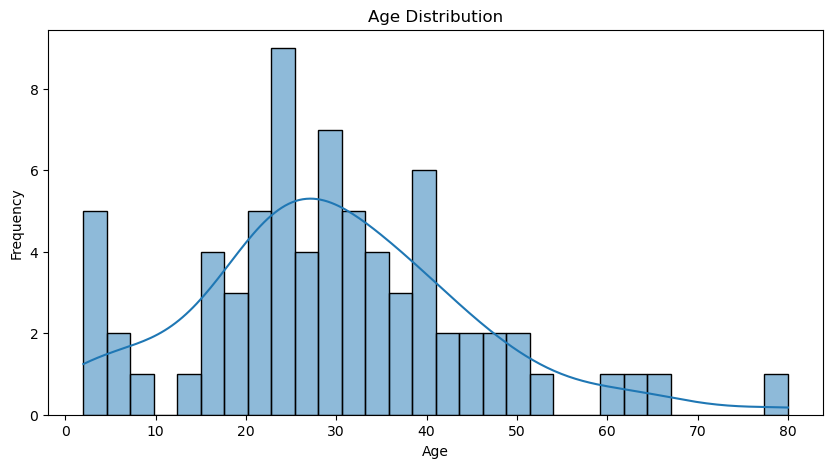

In [103]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_final['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

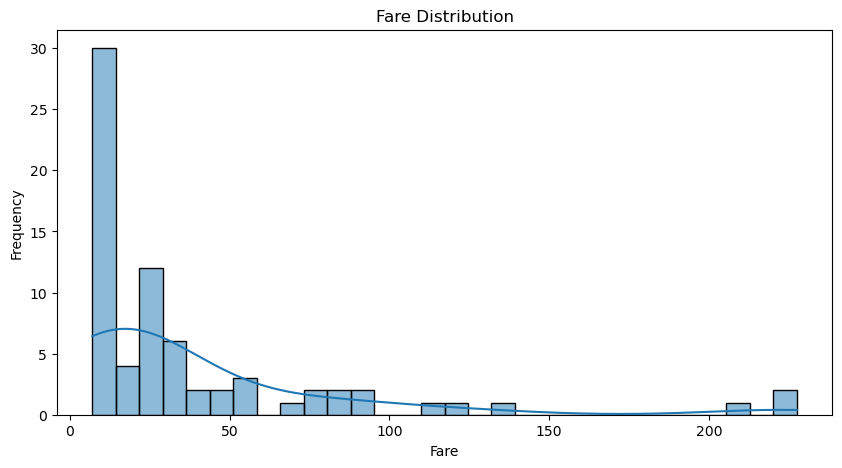

In [105]:
# Fare Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_final['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [109]:
# 3. Correlation Analysis
correlation_matrix = df_final.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'